# Handle Data

In [35]:
import csv

with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    
#Next we need to split the data into a training dataset 

import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):

    with open(filename, 'r') as csvfile:

        lines = csv.reader(csvfile)

        dataset = list(lines)

        for x in range(len(dataset)-1):

            for y in range(4):

                dataset[x][y] = float(dataset[x][y])

            if random.random() < split:
                trainingSet.append(dataset[x][:])
            else:
                testSet.append(dataset[x][:])
    return (trainingSet , testSet)
    



# Similarity

In [36]:
import math
import numpy as np
def euclideanDistance ( instance1 , instance2 , lenght) : 
    somme = 0
    for i in range(0,lenght) : 
        somme += (instance1[i] - instance2[i]) ** 2
    return np.sqrt(somme)

    

# Neighbors

In [37]:
import operator

def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1
    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet[x], length)

        distances.append((trainingSet[x], dist))

    distances.sort(key=operator.itemgetter(1))

    neighbors = []

    for x in range(k):

        neighbors.append(distances[x][0])

    return neighbors
    




# Response

In [38]:
def getResponse(neighbors):

    classVotes = {}

    for x in range(len(neighbors)):

        response = neighbors[x][len(neighbors[x])-1]
        if response in list(classVotes.keys()) :
            classVotes.update({response : classVotes[response]+1})
        else : 
            classVotes.update({response : 1})

   # Complete the if clause

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

    return sortedVotes[0][0]



# Accuracy

In [39]:
def getAccuracy(testSet, predictions):

    correct = 0 
    for i in range(0 , len(testSet)): 
        if testSet[i][4] == predictions[i]  : 
            correct += 1 

    return (correct/float(len(testSet))) * 100.0  



# MAIN

First instance :  [5.1, 3.5, 1.4, 0.2]
First instance neighbors :  [[5.1, 3.5, 1.4, 0.2, 'Iris-setosa']]
first instance predection :  Iris-setosa
k = 1  accurency :  100.0

 
Accurency :  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


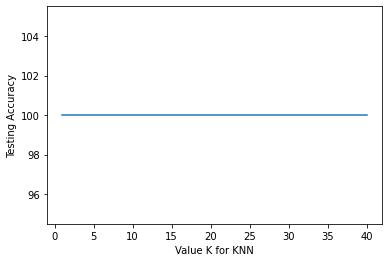

In [44]:
import matplotlib.pyplot as plt
def main () : 

    trainingSet , testSet = loadDataset('iris.data.txt', 0.66)
    predections = []
    m= 1 
    acc = []
    for k in range(1 , 41 ) :
        for instance in testSet : 
            neighbors = getNeighbors(trainingSet , instance, k)
            
            response = getResponse(neighbors)
            if m == 1 : 
                print("First instance : " , instance[0:4])
                print("First instance neighbors : " ,neighbors)
                print("first instance predection : ",response)
                m+=1
                
            predections.append(response)
        
        acc.append(getAccuracy(testSet , predections))
        if m == 2 :
            print("k = 1  accurency : ",acc[0])
            m+=1
    print("\n \nAccurencies : " ,acc )
    
    plt.plot(range(1,41),acc)
    plt.xlabel('Value K for KNN')
    plt.ylabel('Testing Accuracy')

        
    
main()

# Manhatta distance 

In [41]:
def manhattanDistance( instance1 , instance2 , lenght) : 
    somme = 0
    for i in range(0,lenght) : 
        somme += (instance1[i] - instance2[i]) ** 2
    return np.abs(somme)

In [42]:
import operator

def getNeighbors_manhattan(trainingSet, testInstance, k):

    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = manhattanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))

    neighbors = []

    for x in range(k):
        neighbors.append(distances[x][0])

    return neighbors

First instance :  [5.1, 3.5, 1.4, 0.2]
First instance neighbors :  [[5.1, 3.5, 1.4, 0.2, 'Iris-setosa']]
first instance predection :  Iris-setosa
k = 1  accurency :  98.09523809523809

 
Accurency :  [98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809, 98.09523809523809]


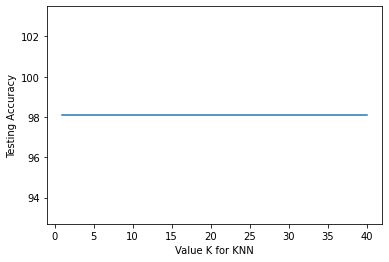

In [43]:
import matplotlib.pyplot as plt

def main () : 

    trainingSet , testSet = loadDataset('iris.data.txt', 0.66)
    predections = []
    m= 1 
    acc = []
    for k in range(1 ,41 ) :
        for instance in testSet : 
            neighbors = getNeighbors_manhattan(trainingSet , instance, k)
            
            response = getResponse(neighbors)
            if m == 1 : 
                print("First instance : " , instance[0:4])
                print("First instance neighbors : " ,neighbors)
                print("first instance predection : ",response)
                m+=1
                
            predections.append(response)
        
        acc.append(getAccuracy(testSet , predections))
        if m == 2 :
            print("k = 1  accurency : ",acc[0])
            m+=1
    print("\n \nAccurencies : " ,acc )
    
    plt.plot(range(1,41),acc)
    plt.xlabel('Value K for KNN')
    plt.ylabel('Testing Accuracy')

        
    
main()